In [1]:
import keras
keras.__version__

/Users/homme/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/homme/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.2.2'

### Paragraph 1 : Original
# Classifying newswires: a multi-class classification example

This notebook contains the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

In the previous section we saw how to classify vector inputs into two mutually exclusive classes using a densely-connected neural network. 
But what happens when you have more than two classes? 

In this section, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many 
classes, this problem is an instance of "multi-class classification", and since each data point should be classified into only one 
category, the problem is more specifically an instance of "single-label, multi-class classification". If each data point could have 
belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.

### Paragraph 1 : Original
# 신문기사 분류해보기 : 다중 클래스 분류 예제

이 Notebook은 Deep Learning with Python의 3장 5절에 나오는 예제 코드가 포함되어 있습니다.  
원본 텍스트(Deep Learning with Python)에 훨씬 더 많은 자료, 특히 추가 설명과 그림들이 포함되어 있습니다.  
여기에서는 예제 코드와 코드에 관련된 설명만 제공됩니다.

----

### Paragraph 1 : Tranlation
앞절에는 우리는 densely-connected neural network를 이용해서 상호 베타적인 두 개의 클래스를 분류하는 방법을 배웠습니다. 그렇다면 분류해야 하는 클래스가 두 가지 이상이라면 어떻게 해야할까요? 이번 장에서는 뉴스 레터들(Reuters newswires)을 46개의 상호-베타적인 주제로 분류해 보도록 하겠습니다. 이를 "다중-클래스 분류" 문제라고 합니다. "다중-클래스" 라고 부르는 이유는 분류해야 할 클래스들이 많기 때문입니다. 그리고 더불어 각 데이터 포인트가 오로지 한 카테고리 안에 속하는 경우에 "단일-레이블, 다중-객체 분류" 문제라고 합니다. 만약 각 데이터 포인트가 여러 카테고리에 속한다면, 이를 "다중-레이블, 다중-클래스 분류" 문제라고 합니다.


### Paragraph 2 : Original

## The Reuters dataset


We will be working with the _Reuters dataset_, a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, 
widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each 
topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let's take a look right away:

### Paragraph 2 : Tranlation

## 로이터(Reuters) 데이터셋

이번에는 _로이터 데이터셋_ 을 가지고 실습을 진행해 보겠습니다. 이 데이터셋은 1986년 로이터에서 발간된 뉴스 단신들로 구성되어 있습니다. 이번에 할 문제도 아주 쉽습니다. 텍스트 분류를 위한 토이 데이터셋으로 아주 널리 사용되는 데이터셋입니다. 총 46가지 주제가 있습니다. 일부 주제들은 학습 샘플이 비교적 많으 반면 어떤 주제는 샘플이 10개 조차 되지 않습니다. IMDB와 MNIST처럼 _로이터 데이터셋_ 또한 Keras 에서 불러올 수 있습니다. 지금 당장 살펴봅시다! 

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 7s 3us/step


Like with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.

We have 8,982 training examples and 2,246 test examples

IMDB 데이터셋에서와 마찬가지고 인자 `num_words = 10000`을 통해서 데이터 내에서 가장 빈번하게 발생하는 단어들 10,000개 만으로 데이터를 제한하도록 하겠습니다. 

_로이터 데이터셋_ 에는 8,982 개의 학습 샘플과 2,246개의 테스트 샘플이 있습니다. 

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

IMDB 에서 봤던 것 처럼 각 샘플들은 integers 리스트로 구성됩니다. (단어에 인덱스를 의미합니다.)

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Here's how you can decode it back to words, in case you are curious:

여기에서는 여러분이 원본 문장에 궁금할 때, Integers를 다시 문장으로 디코딩 하는 방법을 소개합니다.

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index.

각 샘플의 해당 레이블은 0 - 45 사이의 Integer로 표시됩니다: 토픽에 대한 인덱스입니다.

In [6]:
train_labels[10]

3

# Paragraph 3
## Preparing the data

We can vectorize the data with the exact same code as in our previous example:

## 데이터 준비하기

이전 예제에서 사용했던 동일한 코드를 이용해서 데이터를 벡터화 시킬 수 있습니다.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: we could just cast the label list as an integer tensor, or we could use a "one-hot" 
encoding. One-hot encoding is a widely used format for categorical data, also called "categorical encoding". 
For a more detailed explanation of one-hot encoding, you can refer to Chapter 6, Section 1. 
In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector with a 1 in the place of the label index, e.g.:

레이블을 벡터화 하기 위한 방법에는 두 가지 옵션이 존재합니다: 하나는 레이블 리스트를 단순히 Integer tensor로 캐스팅하는 방법입니다. 혹은, "ont-hot" 인코딩을 사용할 수도 있습니다. 원-핫 인코딩은 범주형 데이터 포멧이 아주 널리 사용되는 방법입니다. "범주형 인코딩(categorical encoding" 이라고도 합니다. 원-핫 인코딩에 대한 조금 더 상세한 설명은 6장 1절을 참고하시기 바랍니다. 우리 가진 레이블들을 가지고 원-핫 인코딩을 하는 경우에는 레이블 인덱스가 위치한 자리만 1로 표시하고 나머지 자리는 모두 0으로 채워넣습니다.  
가령 : 

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example

앞서 MNIST 예제에서도 보셨겠지만, Keras에는 이를 실행하기 위한 빌트인(built-in) 이 이미 존재합니다. 

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Paragraph 4
## Building our network


This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to 
classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. 
If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

For this reason we will use larger layers. Let's go with 64 units:

# Paragraph 4
## 네트워크 구성하기

뉴스 주제를 분류하는 문제는 앞서 영화 리뷰를 분류하는 문제와 아주 유사합니다. 두 경우 모두 짧은 텍스트들을 분류하는 문제입니다. 
다만 출력 클래스가 2개에서 46개로 바뀌었습니다. 즉, 출력 공간의 차원이 훨씬 더 큽니다.

우리가 이전에 사용하기도 했었던 `Dense` 레이어에서는, 각 레이어는 오직 이전 레이어의 출력의 정보에만 접근할 수 있습니다. 
만일 어떤 레이어가 분류 문제에 필요한 정보를 잃는다면, 이 정보는 이 후의 레이어에서 복구할 수 없습니다. 어떤 레이어가 "정보 병목"이 될 수 있는 것입니다. 
앞선 예제에서, 우리는 16차원의 중간 레이어들을 사용했습니다. 하지만 16-차원은 46개의 다양한 클래스를 나누기에는 턱없이 부족합니다. 이러한 크기가 작은 레이어들은 정보 병목으로서의 역할을 하여 정보를 영구적으로 떨어뜨립니다.

이러한 이유로 인해 우리는 이제 조금 더 큰 레이어를 사용할 것입니다. 우선 64개의 유닛으로 시작해봅시다. 

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

* We are ending the network with a `Dense` layer of size 46. This means that for each input sample, our network will output a 
46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a `softmax` activation. You have already seen this pattern in the MNIST example. It means that the network will 
output a _probability distribution_ over the 46 different output classes, i.e. for every input sample, the network will produce a 
46-dimensional output vector where `output[i]` is the probability that the sample belongs to class `i`. The 46 scores will sum to 1.

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: 
in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the 
distance between these two distributions, we train our network to output something as close as possible to the true labels.

우리가 설계한 아키텍쳐에 대해서 여러분이 알고 넘어가야 할 것이 두 가지 있습니다. 

* 이 네트워크의 마지막은 46 사이즈의 `Dense` 레이어로 구성됩니다. 이는 네트워크의 출력이 46-차원 벡터임을 의미합니다. 이 벡터의 각 요소는 하나의 출력 클래스입니다.  

* 마지막 레이어에서는 활성 함수로 `softmax`를 이용합니다. 우리는 이미 MNIST 예제에서 살펴본 적이 있습니다. `softmax`라는 것은 출력이 46 개의 출력 클래스에 대한 `확률 분포` 임을 의미합니다. 즉, 모든 입력 샘플에서 네트워크가 46-차원 벡터를 출력하는데, `output[i]`는 입력 샘플이 `i`번째 클래스에 속할 확률을 의미합니다. 46개의 스코어를 모두 더하면 1이 됩니다.

이 경우 가장 쓸만한 손실 함수는 `categorical_crossentropy` 입니다. 이는 두 개의 확률분포 사이의 거리를 측정하는 방법입니다. 이 예시의 경우에는 네트워크의 출력의 확률분포와 정답 레이블의 정답분포 사이의 거리입니다. 이 두 분포 간의 거리를 최소화 함으로써, 우리는 출력이 정답 레이블에 가까워 지도록 학습을 시킬 수 있는 것입니다. 

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Paragraph 5
## Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

# Paragraph 5
## 모델 검증하기

앞서 1,000개의 **학습 데이터**(training data) 를 **검증 집합**(validation set) 으로 남겨두었습니다.

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now let's train our network for 20 epochs:

네트워크를 20 에포크 동안 학습시켜봅시다:

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 241us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
E

Let's display its loss and accuracy curves:

손실과 정확도 커브를 출력시켜봅시다.

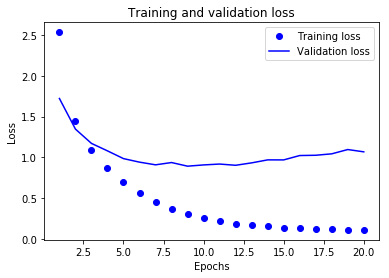

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

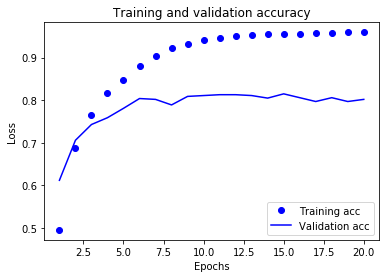

In [15]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on 
the test set:

네트워크가 8에포크 이후로는 과적합하는 것 같습니다. 새로운 네트워크를 처음부터 8에포크 까지만 학습시키고 시험 집합을 평가해봅시다.

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 148us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 100us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 101us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 114us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 103us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 1s 100us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 1s 102us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [17]:
results

[0.9845061221509137, 0.7836153161175423]

Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier 
would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

우리의 모델은 78%의 정확도를 기록했습니다. 데이터 집합이 고루 분포된 이진 분류 문제의 경우, 둘 중 하나를 찍는 분류기의 성능은 적확도는 50% 일 것입니다. 
하지만 우리의 경우는 46 클래스를 분류하는 문제이므로, 아무리 잘 찍어도 19% 를 넘기긴 힘들 것입니다. 따라서 78% 라는 정확도는 아주 좋습니다. 적어도 그냥 찍는 모델에 비해서는 말이죠.

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1834372217275156

# Paragraph 6
## Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic predictions for all of the test data:

# Paragraph 6
## 새로운 데이터에 대한 예측 모델 생성하기 

`predict` 라는 메소드가 46개 토픽에 대한 확률 분포를 반환함을 알 수 있습니다. 자 그럼 모든 시험 데이터에 대해서 토픽을 예측해봅시다. 

In [23]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46:

`prediction` 변수의 각 요소는 길이가 46인 벡터입니다:

In [24]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

이 벡터의 각 요소를 더하면 1이 됩니다:

In [25]:
np.sum(predictions[0])

1.0000001

The largest entry is the predicted class, i.e. the class with the highest probability:

그리고 그 중 가장 값이 높은 클래스로 예측합니다. 즉 가장 확률이 높은 클래스를 선택하는 것입니다.

In [26]:
np.argmax(predictions[0])

3

# Paragraph 7
## A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like such:

# Paragraph 7
## 레이블과 손실을 다루는 다른 방법

앞서 레이블을 인코딩 하는 방식 중 intefer tensor로 인코딩하는 법에 대해서 말씀드렸습니다. 다음과 같은 방식입니다 : 

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to 
follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

이를 위해서는 손실 함수를 조금 손봐줘야 합니다. 앞서 레이블이 범주형 인코딩이었기 때문에 `categorical_crossentropy`를 사용하였습니다. integer 레이블들의 경우에는 `sparse_categorical_crossentropy`를 사용해야 합니다.

In [36]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.

이 새로운 손실 함수는 수학적으로 `categorical_crossentropy`와 동일합니다. 다만 생긴 모습만 조금 다를 뿐입니다.

# Paragraph 8
## On the importance of having sufficiently large intermediate layers


We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden 
units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 
46-dimensional, e.g. 4-dimensional.

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s - loss: 3.1620 - acc: 0.2295 - val_loss: 2.6750 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 2.2009 - acc: 0.3829 - val_loss: 1.7626 - val_acc: 0.5990
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.4490 - acc: 0.6486 - val_loss: 1.4738 - val_acc: 0.6390
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 1.2258 - acc: 0.6776 - val_loss: 1.3961 - val_acc: 0.6570
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 1.0886 - acc: 0.7032 - val_loss: 1.3727 - val_acc: 0.6700
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.9817 - acc: 0.7494 - val_loss: 1.3682 - val_acc: 0.6800
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.8937 - acc: 0.7757 - val_loss: 1.3587 - val_acc: 0.6810
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.8213 - a


Our network now seems to peak at ~71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to 
compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is 
too low-dimensional. The network is able to cram _most_ of the necessary information into these 8-dimensional representations, but not all 
of it.

# Paragraph 9
## Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

## Wrapping up


Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.